In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

C:\Users\Duy.TC214885\AppData\Local\miniconda3\lib\site-packages\h5py\__init__.py:36: UserWarning: h5py is running against HDF5 1.12.2 when it was built against 1.12.1, this may cause problems
  _warn(("h5py is running against HDF5 {0} when it was built against {1}, "


In [2]:
cardboard = []
for i in range(1,404):
    temp = tf.keras.preprocessing.image.load_img(
        path = "dataset-resized/cardboard/cardboard"+str(i)+".jpg",
        grayscale=False, color_mode='rgb',target_size=(227,227))
    X = np.array(temp)
    cardboard.append(X)
cardboard = np.array(cardboard)
cardboard = np.take(cardboard,np.random.permutation(cardboard.shape[0]),axis=0)
print(cardboard.shape)

(403, 227, 227, 3)


In [3]:
glass = []
for i in range(1,502):
    temp = tf.keras.preprocessing.image.load_img(
        path = "dataset-resized/glass/glass"+str(i)+".jpg",
        grayscale=False, color_mode='rgb',target_size=(227,227))
    X = np.array(temp)
    glass.append(X)
glass = np.array(glass)
glass = np.take(glass,np.random.permutation(glass.shape[0]),axis=0)
print(glass.shape)

(501, 227, 227, 3)


In [4]:
metal = []
for i in range(1,411):
    temp = tf.keras.preprocessing.image.load_img(
        path = "dataset-resized/metal/metal"+str(i)+".jpg",
        grayscale=False, color_mode='rgb',target_size=(227,227))
    X = np.array(temp)
    metal.append(X)
metal = np.array(metal)
metal = np.take(metal,np.random.permutation(metal.shape[0]),axis=0)
print(metal.shape)

(410, 227, 227, 3)


In [5]:
paper = []
for i in range(1,595):
    temp = tf.keras.preprocessing.image.load_img(
        path = "dataset-resized/paper/paper"+str(i)+".jpg",
        grayscale=False, color_mode='rgb',target_size=(227,227))
    X = np.array(temp)
    paper.append(X)
paper = np.array(paper)
paper = np.take(paper,np.random.permutation(paper.shape[0]),axis=0)
print(paper.shape)

(594, 227, 227, 3)


In [6]:
plastic = []
for i in range(1,483):
    temp = tf.keras.preprocessing.image.load_img(
        path = "dataset-resized/plastic/plastic"+str(i)+".jpg",
        grayscale=False, color_mode='rgb',target_size=(227,227))
    X = np.array(temp)
    plastic.append(X)
plastic = np.array(plastic)
plastic = np.take(plastic,np.random.permutation(plastic.shape[0]),axis=0)
print(plastic.shape)

(482, 227, 227, 3)


In [7]:
trash = []
for i in range(1,138):
    temp = tf.keras.preprocessing.image.load_img(
        path = "dataset-resized/trash/trash"+str(i)+".jpg",
        grayscale=False, color_mode='rgb',target_size=(227,227))
    X = np.array(temp)
    trash.append(X)
trash = np.array(trash)
trash = np.take(trash,np.random.permutation(trash.shape[0]),axis=0)
print(trash.shape)

(137, 227, 227, 3)


In [8]:
train_X = np.vstack((cardboard[:302,:,:,:],glass[:376,:,:,:],metal[:307,:,:,:],
                    paper[:445,:,:,:],plastic[:361,:,:,:],trash[:103,:,:,:]))
test_X = np.vstack((cardboard[302:,:,:,:],glass[376:,:,:,:],metal[307:,:,:,:],
                   paper[445:,:,:,:],plastic[361:,:,:,:],trash[103:,:,:,:]))
train_Y = np.zeros((6,train_X.shape[0]))
test_Y = np.zeros((6,test_X.shape[0]))
for i in range(train_X.shape[0]):
    if(i<302):
        train_Y[0][i] = 1
    elif(i<678):
        train_Y[1][i] = 1
    elif(i<985):
        train_Y[2][i] = 1
    elif(i<1430):
        train_Y[3][i] = 1
    elif(i<1791):
        train_Y[4][i] = 1
    else:
        train_Y[5][i] = 1
for i in range(test_X.shape[0]):
    if(i<101):
        test_Y[0][i] = 1
    elif(i<226):
        test_Y[1][i] = 1
    elif(i<329):
        test_Y[2][i] = 1
    elif(i<478):
        test_Y[3][i] = 1
    elif(i<599):
        test_Y[4][i] = 1
    else:
        test_Y[5][i] = 1

In [9]:
np.random.seed(1013)
train_perm = np.random.permutation(train_X.shape[0])
train_X = np.take(train_X,train_perm,axis=0)
print(train_X.shape)
train_Y = np.take(train_Y,train_perm,axis=1)
print(train_Y.shape)
np.random.seed(901)
test_perm = np.random.permutation(test_X.shape[0])
test_X = np.take(test_X,test_perm,axis=0)
print(test_X.shape)
test_Y = np.take(test_Y,test_perm,axis=1)
print(test_Y.shape)

(1894, 227, 227, 3)
(6, 1894)
(633, 227, 227, 3)
(6, 633)


In [10]:
def identity_block(X, f, filters, stage, block):
    conv_name_base = 'res' + str(stage) + block + '_branch'
    bn_name_base = 'bn' + str(stage) + block + '_branch'
    
    F1, F2, F3 = filters
    
    X_shortcut = X
    
    X = tf.keras.layers.Conv2D(filters = F1, kernel_size = (1, 1), strides = (1,1), padding = 'valid', name = conv_name_base + '2a')(X)
    X = tf.keras.layers.BatchNormalization(axis = 3, name = bn_name_base + '2a')(X)
    X = tf.keras.layers.Activation('relu')(X)
    
    X = tf.keras.layers.Conv2D(filters = F2, kernel_size = (f, f), strides = (1,1), padding = 'same', name = conv_name_base + '2b')(X)
    X = tf.keras.layers.BatchNormalization(axis = 3, name = bn_name_base + '2b')(X)
    X = tf.keras.layers.Activation('relu')(X)
    
    X = tf.keras.layers.Conv2D(filters = F3, kernel_size = (1, 1), strides = (1,1), padding = 'valid', name = conv_name_base + '2c')(X)
    X = tf.keras.layers.BatchNormalization(axis = 3, name = bn_name_base + '2c')(X)

    X = tf.keras.layers.Add()([X_shortcut,X])
    X = tf.keras.layers.Activation('relu')(X)
    
    return X

In [11]:
def convolutional_block(X, f, filters, stage, block, s = 2):
    conv_name_base = 'res' + str(stage) + block + '_branch'
    bn_name_base = 'bn' + str(stage) + block + '_branch'
    
    F1, F2, F3 = filters

    X_shortcut = X

    X = tf.keras.layers.Conv2D(F1, (1, 1), strides = (s,s), name = conv_name_base + '2a')(X)
    X = tf.keras.layers.BatchNormalization(axis = 3, name = bn_name_base + '2a')(X)
    X = tf.keras.layers.Activation('relu')(X)

    X = tf.keras.layers.Conv2D(F2, (f, f), strides = (1,1), padding = 'same',name = conv_name_base + '2b')(X)
    X = tf.keras.layers.BatchNormalization(axis = 3, name = bn_name_base + '2b')(X)
    X = tf.keras.layers.Activation('relu')(X)

    X = tf.keras.layers.Conv2D(F3, (1, 1), strides = (1,1), padding = 'valid',name = conv_name_base + '2c')(X)
    X = tf.keras.layers.BatchNormalization(axis = 3, name = bn_name_base + '2c')(X)

    X_shortcut = tf.keras.layers.Conv2D(F3, (1, 1), strides = (s,s), padding = 'valid',name = conv_name_base + '1')(X_shortcut)
    X_shortcut = tf.keras.layers.BatchNormalization(axis = 3, name = bn_name_base + '1')(X_shortcut)

    X = tf.keras.layers.Add()([X_shortcut,X])
    X = tf.keras.layers.Activation('relu')(X)

    return X

In [12]:
def ResNet50(input_shape = (227, 227, 3), classes = 6):
    X_input = tf.keras.layers.Input(input_shape)
    
    X = tf.keras.layers.Conv2D(64, (7, 7), strides = (2, 2), name = 'conv1')(X_input)
    X = tf.keras.layers.BatchNormalization(axis = 3, name = 'bn_conv1')(X)
    X = tf.keras.layers.Activation('relu')(X)
    X = tf.keras.layers.MaxPooling2D((3, 3), strides=(2, 2))(X)

    X = convolutional_block(X, f = 3, filters = [64, 64, 256], stage = 2, block='a', s = 1)
    X = identity_block(X, 3, [64, 64, 256], stage=2, block='b')
    X = identity_block(X, 3, [64, 64, 256], stage=2, block='c')

    X = convolutional_block(X, f = 3, filters = [128, 128, 512], stage = 3, block='a', s = 2)
    X = identity_block(X, 3, [128, 128, 512], stage=3, block='b')
    X = identity_block(X, 3, [128, 128, 512], stage=3, block='c')
    X = identity_block(X, 3, [128, 128, 512], stage=3, block='d')

    X = convolutional_block(X, f = 3, filters = [256, 256, 1024], stage = 4, block='a', s = 2)
    X = identity_block(X, 3, [256, 256, 1024], stage=4, block='b')
    X = identity_block(X, 3, [256, 256, 1024], stage=4, block='c')
    X = identity_block(X, 3, [256, 256, 1024], stage=4, block='d')
    X = identity_block(X, 3, [256, 256, 1024], stage=4, block='e')
    X = identity_block(X, 3, [256, 256, 1024], stage=4, block='f')

    X = convolutional_block(X, f = 3, filters = [512, 512, 2048], stage = 5, block='a', s = 2)
    X = identity_block(X, 3, [512, 512, 2048], stage=5, block='b')
    X = identity_block(X, 3, [512, 512, 2048], stage=5, block='c')

    X = tf.keras.layers.MaxPooling2D((2, 2))(X)

    X = tf.keras.layers.Flatten()(X)
    X = tf.keras.layers.Dense(classes, activation='softmax', name='fc' + str(classes))(X)
    
    model = tf.keras.Model(inputs = X_input, outputs = X, name='ResNet50')

    return model

In [13]:
model = ResNet50()
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.000005), loss='categorical_crossentropy', metrics=['accuracy'])

In [14]:
history = model.fit(train_X, train_Y.T, epochs = 40, batch_size = 32)

Epoch 1/40
60/60 [==============================] - 235s 4s/step - loss: 2.9196 - accuracy: 0.2244
Epoch 2/40
60/60 [==============================] - 225s 4s/step - loss: 2.1395 - accuracy: 0.2872
Epoch 3/40
60/60 [==============================] - 230s 4s/step - loss: 2.0134 - accuracy: 0.3173
Epoch 4/40
60/60 [==============================] - 226s 4s/step - loss: 1.8631 - accuracy: 0.3395
Epoch 5/40
60/60 [==============================] - 226s 4s/step - loss: 1.7767 - accuracy: 0.3828
Epoch 6/40
60/60 [==============================] - 229s 4s/step - loss: 1.6907 - accuracy: 0.3955
Epoch 7/40
60/60 [==============================] - 226s 4s/step - loss: 1.5940 - accuracy: 0.4155
Epoch 8/40
60/60 [==============================] - 221s 4s/step - loss: 1.5272 - accuracy: 0.4636
Epoch 9/40
60/60 [==============================] - 232s 4s/step - loss: 1.5730 - accuracy: 0.4335
Epoch 10/40
60/60 [==============================] - 224s 4s/step - loss: 1.4702 - accuracy: 0.4667
Epoch 11/

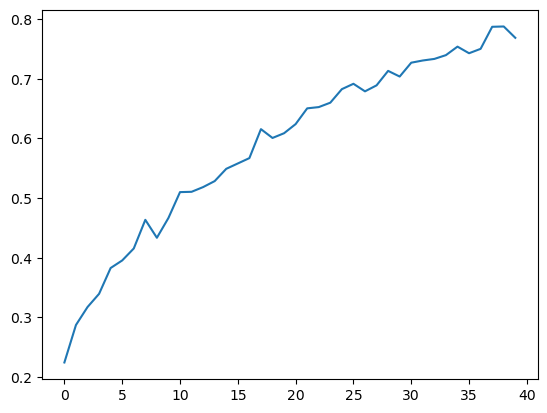

In [15]:
plt.plot(history.history["accuracy"])
plt.show()

In [16]:
preds = model.evaluate(test_X, test_Y.T)
print ("Loss = " + str(preds[0]))
print ("Test Accuracy = " + str(preds[1]))

20/20 [==============================] - 36s 2s/step - loss: 1.6490 - accuracy: 0.4929
Loss = 1.648992657661438
Test Accuracy = 0.49289098381996155


In [17]:
model.summary()

Model: "ResNet50"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 227, 227, 3)]        0         []                            
                                                                                                  
 conv1 (Conv2D)              (None, 111, 111, 64)         9472      ['input_1[0][0]']             
                                                                                                  
 bn_conv1 (BatchNormalizati  (None, 111, 111, 64)         256       ['conv1[0][0]']               
 on)                                                                                              
                                                                                                  
 activation (Activation)     (None, 111, 111, 64)         0         ['bn_conv1[0][0]']     